In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("consumo_casa.csv")


df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Dia'] = df['Fecha'].dt.day
df['Hora'] = df['Fecha'].dt.hour
df['Minuto'] = df['Fecha'].dt.minute

del df['Unnamed: 0']
del df['Fecha']

columnas = df.columns.tolist()
ultimas_tres_columnas = columnas[-3:]
nuevas_columnas = ultimas_tres_columnas + columnas[:-3]
df = df[nuevas_columnas]

df.columns = df.columns.str.replace(' ', '')
df = df.rename(columns={'Medidor[W]': 'Medidor'})
df1 = df.iloc[:, :4] # Selecciona las dos primeras columnas
df2 = df.iloc[:, 4:] # Selecciona las columnas desde la tercera en adelante

In [3]:
df2

,Refrigerator,Clotheswasher,ClothesIron,Computer,Oven,Play,TV,Soundsystem
0,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1
1,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1
2,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0
3,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0
4,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1
...,...,...,...,...,...,...,...,...
194118,0.1,1.4,0.0,0.0,0.8,0.4,0.2,0.4
194119,1.0,1.3,0.1,0.0,1.0,1.3,1.0,0.6
194120,0.0,1.8,0.1,0.0,0.1,0.1,1.0,0.6
194121,0.4,0.0,0.1,0.0,0.4,0.1,1.1,1.0


In [4]:
df2 = df2.applymap(lambda x: 1 if x > 0 else x)

C:\Users\Asus\AppData\Local\Temp\ipykernel_68736\3748833125.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: 1 if x > 0 else x)


In [5]:
df2

,Refrigerator,Clotheswasher,ClothesIron,Computer,Oven,Play,TV,Soundsystem
0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
194118,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
194119,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
194120,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
194121,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [6]:
X = df1
y = df2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0) # 0.25 * 0.8 = 0.2

In [7]:
model_preds = []
def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    disp = ConfusionMatrixDisplay(matriz)
    model_preds.append([model_name, exactitud, precision, f1])
    disp.plot()
    print ("Confusion Matrix: ", matriz)
    print ("Accuracy Score: ", exactitud)
    print("Precision Score: ", precision)
    print("F1 Score: ", f1)

In [8]:
def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "Accuracy", "Precision", "F1 Score"]
    return preds.sort_values(by="Accuracy", ascending=False)

Confusion Matrix:  [[ 1126  3882]
 [ 4312 29505]]
Accuracy Score:  0.7889504185447521
Precision Score:  0.8837271992092731
F1 Score:  0.8780727337658473


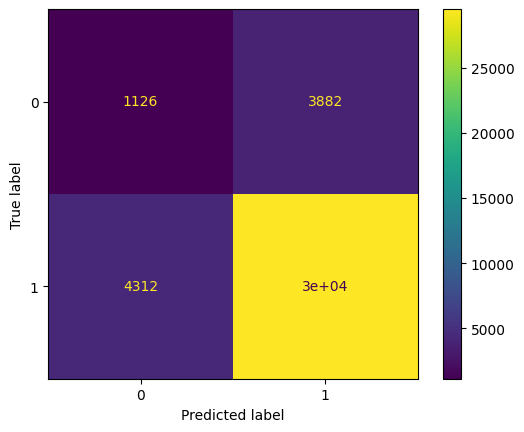

In [9]:
DTree_c = DecisionTreeClassifier(random_state=0)
fit_model(DTree_c, "Dtree")

Confusion Matrix:  [[  387  4621]
 [ 1089 32728]]
Accuracy Score:  0.8529298132646491
Precision Score:  0.8762751345417548
F1 Score:  0.9197650563471321


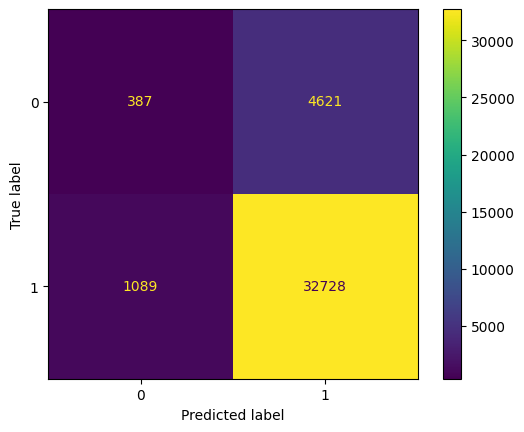

In [10]:
Rforest_c = RandomForestClassifier(random_state=0)
fit_model(Rforest_c, "Rforest")

Confusion Matrix:  [[    1  5007]
 [    2 33815]]
Accuracy Score:  0.8709851899549259
Precision Score:  0.8710267374169286
F1 Score:  0.9310425528985807


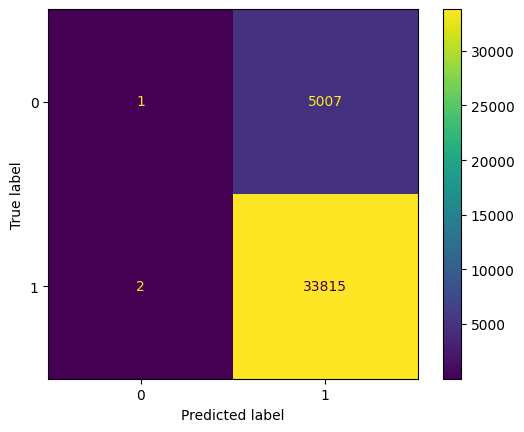

In [11]:
GBoost_c = GradientBoostingClassifier(random_state=0)
fit_model(GBoost_c, "GBoost")

Confusion Matrix:  [[    0  5008]
 [    0 33817]]
Accuracy Score:  0.8710109465550547
Precision Score:  0.8710109465550547
F1 Score:  0.9310591668731587


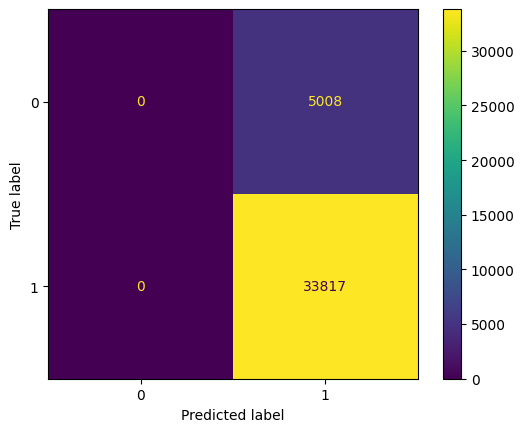

In [12]:
MLP_c = MLPClassifier(random_state=15)
fit_model(MLP_c, "MLP")

Confusion Matrix:  [[    0  5008]
 [    0 33817]]
Accuracy Score:  0.8710109465550547
Precision Score:  0.8710109465550547
F1 Score:  0.9310591668731587


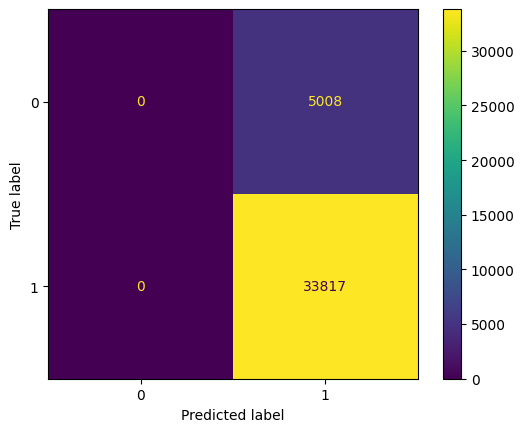

In [13]:
logistic_regression_c = LogisticRegression(random_state=25)
fit_model(logistic_regression_c, "Logistic Regression")